# Generate QC plots

In [5]:
suppressPackageStartupMessages(library(SummarizedExperiment))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggplot2))

In [7]:
# load pre-qc'ed data
se.qc <- readRDS('../01-data/se.qc.rds')

In [8]:
se.qc

class: SummarizedExperiment 
dim: 35405 308 
metadata(0):
assays(1): counts
rownames(35405): ENSMMUG00000023296.4 ENSMMUG00000036181.3 ... EBOV-L
  EBOV-3pTrailer
rowData names(12): Geneid Chr ... external_gene_source description
colnames(308): A0001_S121_L002 A0002_S124_L002 ...
  Zyagen_D000_Spleen.190507_long_S1 Zyagen_D000_Testis.160421_long_S16
colData names(68): file_identifiers A.identifier ...
  duplicate_sequencing dpi_time_2

In [11]:
table(se.qc$duplicate_sequencing)


FALSE 
  308 

In [12]:
# subset to non-Zyagen samples only
se.qc.experimental <- se.qc[,colData(se.qc)$SampleType == 'Experimental']

In [13]:
colData(se.qc.experimental)$tissue <- as.factor(as.character(colData(se.qc.experimental)$tissue))

In [14]:
# Convert to df to enable auto-complete
sample.info.df <- as.data.frame(colData(se.qc.experimental))

In [8]:
## Sample overview

In [15]:
library(RColorBrewer)

In [16]:
# Create re-usable palette for tissues
levels(sample.info.df$tissue)

[1] "Adrenal Gland" "Brain"         "Kidney"        "Liver"        
 [5] "Lung"          "Lymph node"    "PBMC"          "Sex Organ"    
 [9] "Skin"          "Spleen"        "Whole blood"

In [17]:
n.tissues <- nlevels(sample.info.df$tissue)

In [18]:
tissue.pal <- brewer.pal(n=n.tissues,name='Set3')

In [19]:
names(tissue.pal) <- levels(sample.info.df$tissue)

In [20]:
saveRDS(tissue.pal,'tissue.pal.rds')

In [21]:
colnames(sample.info.df)

[1] "file_identifiers"              "A.identifier"                 
 [3] "biosample"                     "batch.extraction"             
 [5] "irf.study.id"                  "id.cohort"                    
 [7] "id.individual"                 "tissue"                       
 [9] "data.received"                 "dn.rna"                       
[11] "date.broad.extract"            "quant.18s"                    
[13] "quant.18s.sd"                  "quant.kulesh"                 
[15] "quant.kulesh.sd"               "rin.e"                        
[17] "rna.conc.ng.uL"                "lib.conc.pmolar"              
[19] "xgen.index"                    "Assigned"                     
[21] "Unassigned_Unmapped"           "Unassigned_Read_Type"         
[23] "Unassigned_Singleton"          "Unassigned_MappingQuality"    
[25] "Unassigned_Chimera"            "Unassigned_FragmentLength"    
[27] "Unassigned_Duplicate"          "Unassigned_MultiMapping"      
[29] "Unassigned_Secondary"          "Unassigned_NonSplit"          
[31] "Unassigned_NoFeatures"         "Unassigned_Overlapping_Length"
[33] "Unassigned_Ambiguity"          "sub.tissue"                   
[35] "SampleType"                    "study.group"                  
[37] "challenge.group"               "animal.number"                
[39] "animal.tatoo"                  "sex"                          
[41] "weight"                        "birth.date"                   
[43] "viralReadCount"                "hostReadCount"                
[45] "pc.viral.reads"                "cohort.uncertain"             
[47] "cohort.numeric"                "totalReadCount"               
[49] "totalUnassigned"               "chrY_count"                   
[51] "chrX_count"                    "total_count"                  
[53] "Xist"                          "sex.1"                        
[55] "pc_Y"                          "pc_X"                         
[57] "Y_X_ratio"                     "sex_pred"                     
[59] "pred_recorded_sex_mismatch"    "dpi_time"                     
[61] "dpi_time_factor"               "xist_counts"                  
[63] "predicted_sex"                 "pred_rec_sex_mismatch"        
[65] "full.tissue"                   "sample_id_dedup"              
[67] "duplicate_sequencing"          "dpi_time_2"

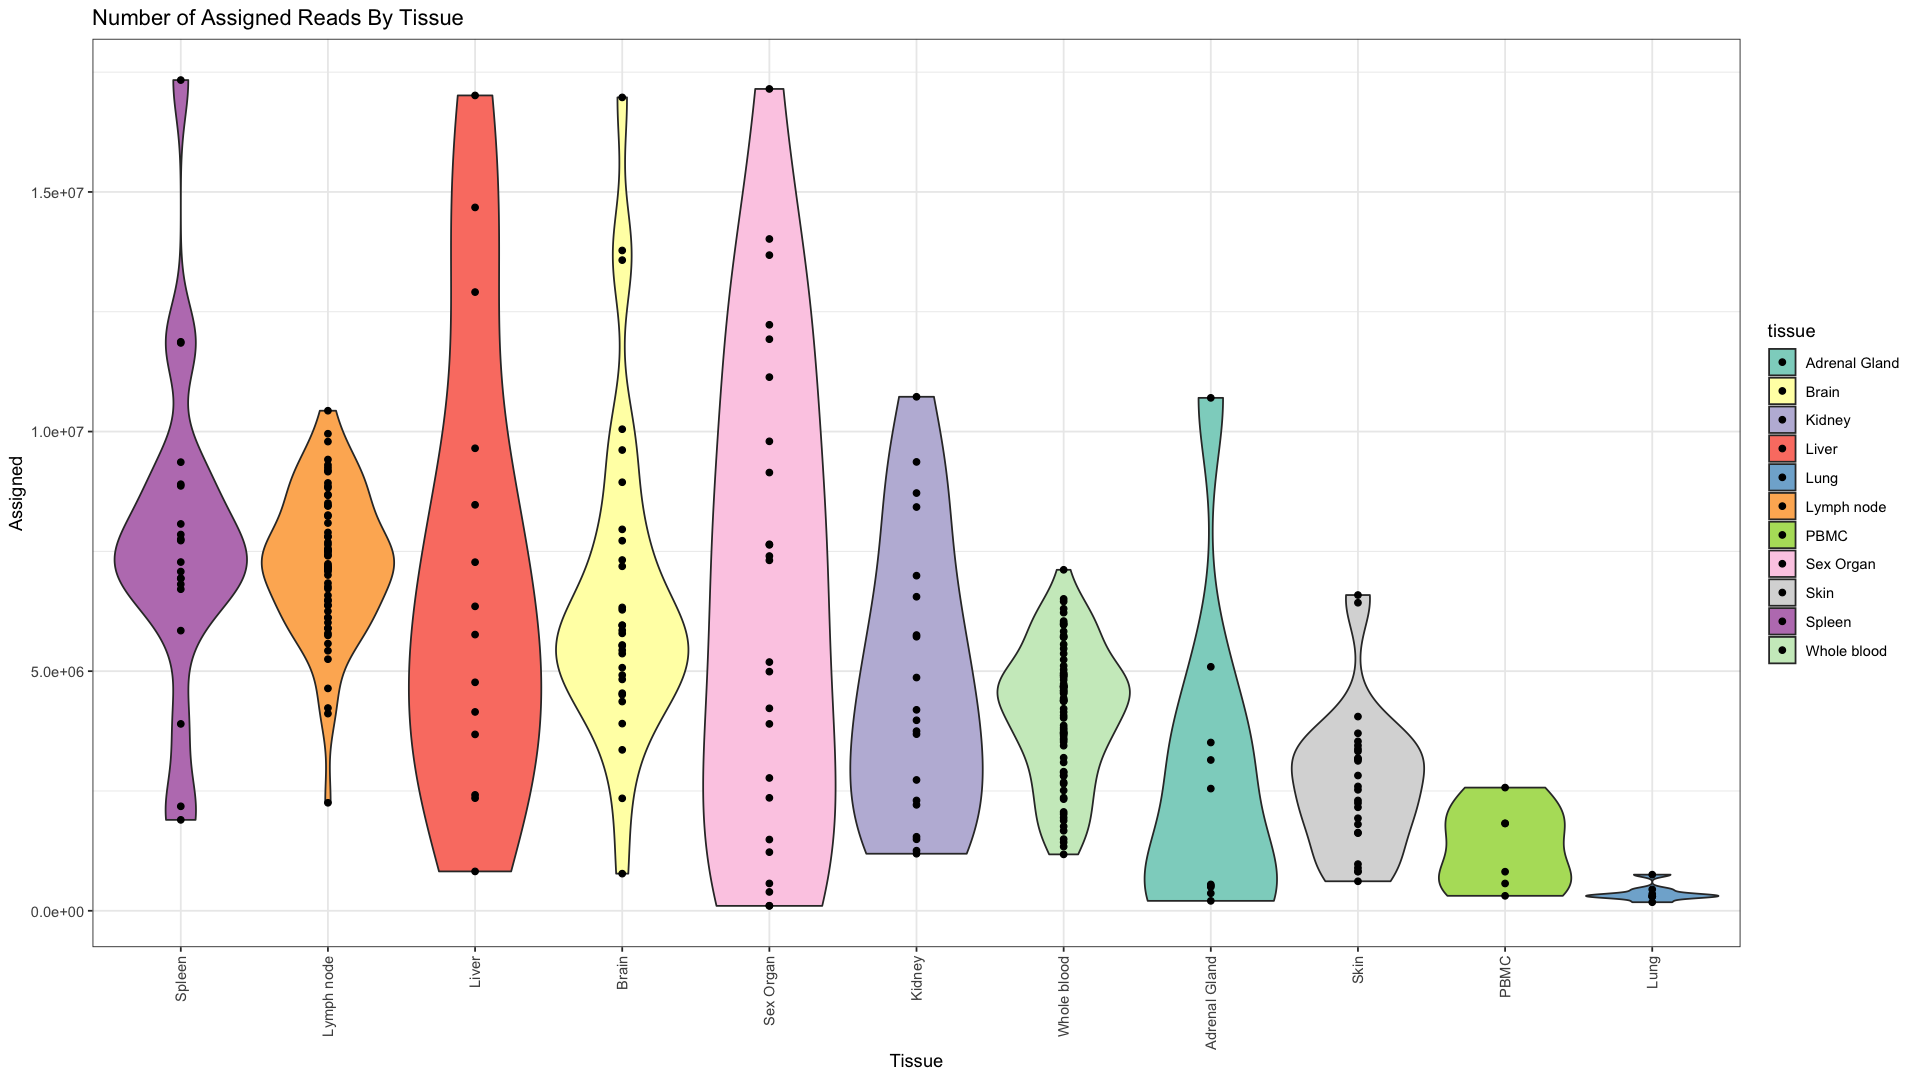

In [22]:
ggplot(sample.info.df, aes(y=Assigned,x=reorder(tissue,-Assigned,mean), fill=tissue)) + 
  geom_violin(scale='width') +
 theme_bw() + geom_point()+
 theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
 scale_fill_manual(values=tissue.pal) +
 scale_x_discrete(name="Tissue") + 
 ggtitle("Number of Assigned Reads By Tissue")

In [17]:
ggsave("plots/assigned_reads_by_tissue.pdf",w=10,h=10)

In [24]:
temp<-read.csv(file = "../05-sample_overview/full_tissue_color.csv",header = F)
color_ft<-temp$V2
names(color_ft)<-temp$V1
color_ft

Spleen              Kidney       Adrenal Gland      Brain:Brain-Gr 
          "#BC80BD"           "#BEBADA"           "#8DD3C7"           "#FB8072" 
     Brain:Brain-Wh               Liver                Lung  Lymph node:LN-AX-R 
          "#a34136"           "#fff265"           "#80B1D3"           "#FDB462" 
Lymph node:LN-ING-L   Lymph node:LN-MES       Lymph node:NA                PBMC 
          "#ed830c"           "#f5b771"           "#ff8700"           "#B3DE69" 
    Sex Organ:Ovary Sex Organ:Sex-Organ    Sex Organ:Testis       Skin:Non-Rash 
          "#e64e9b"           "#FCCDE5"           "#a82d6c"           "#6e6969" 
          Skin:Rash          SpinalCord         Whole blood 
          "#D9D9D9"           "#f93d28"           "#CCEBC5"

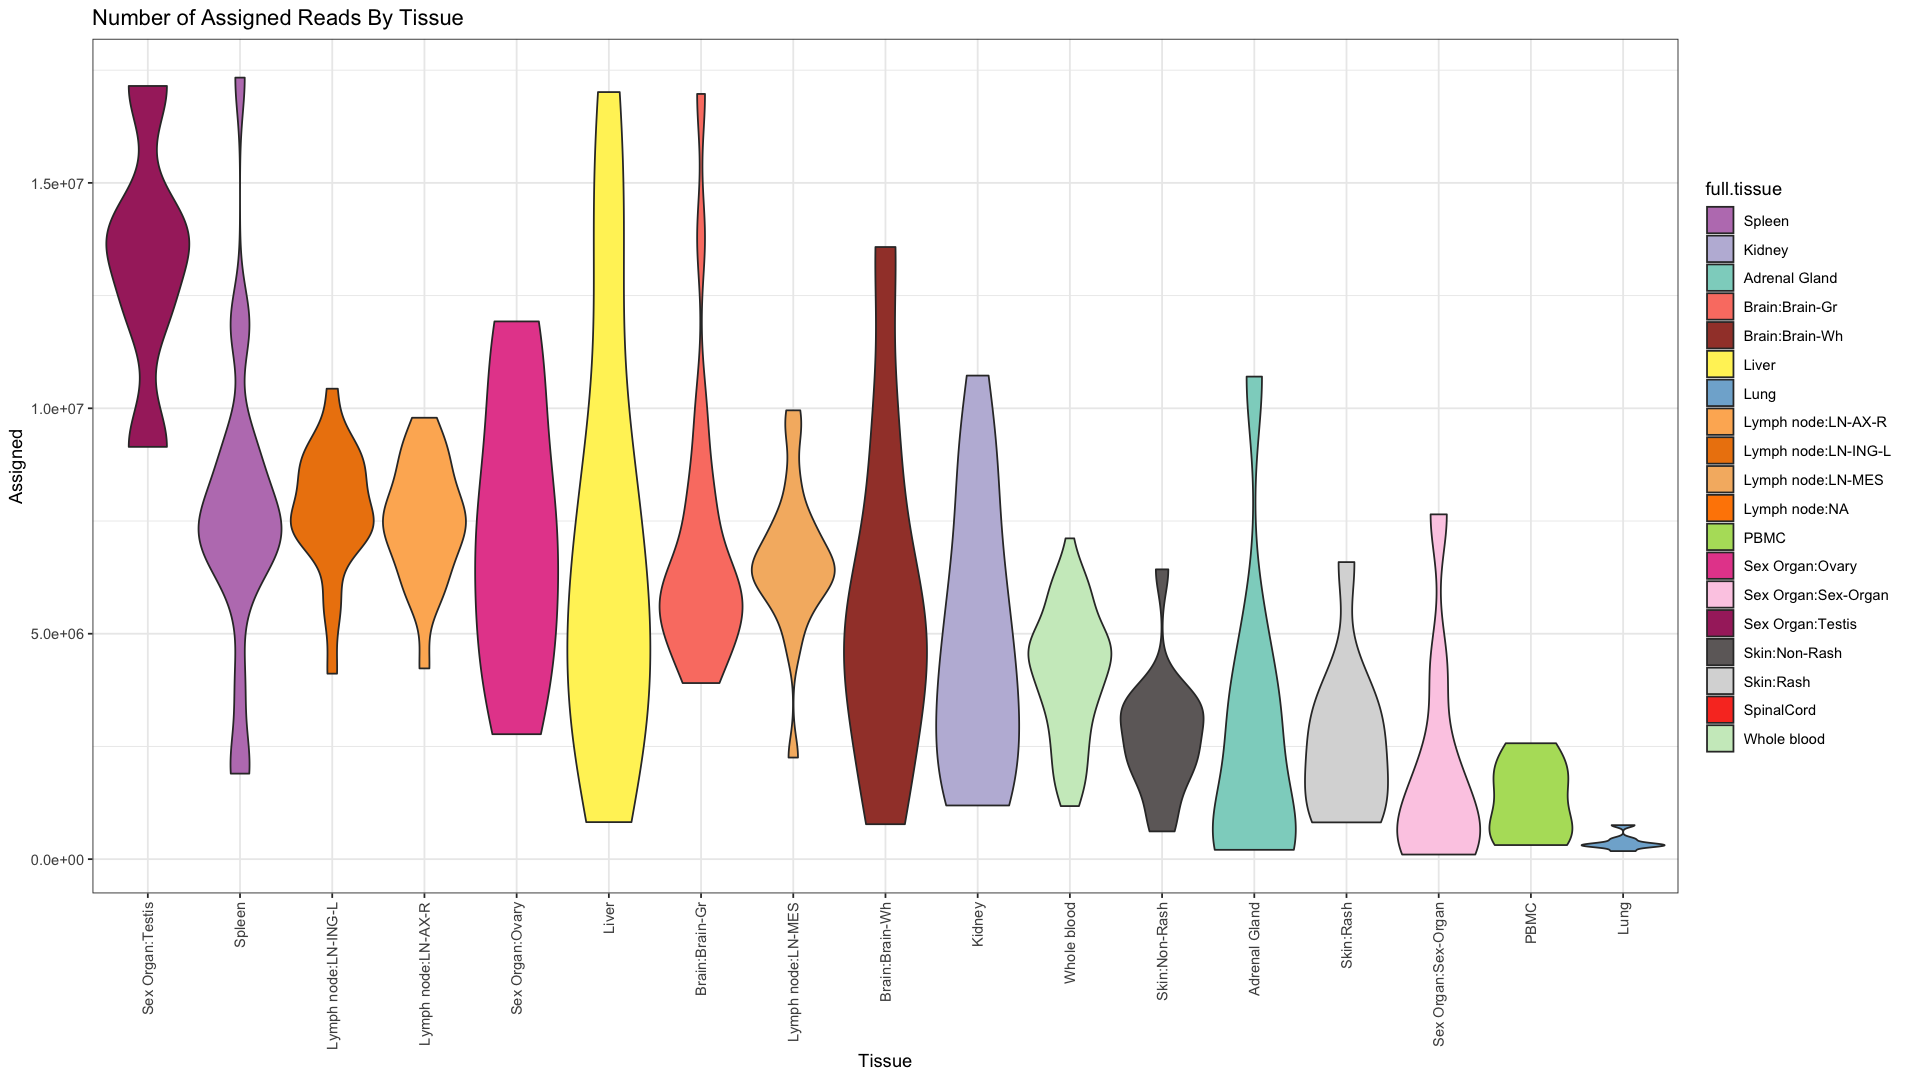

In [39]:
ggplot(sample.info.df, aes(y=Assigned,x=reorder(full.tissue,-Assigned,mean), fill=full.tissue)) + 
  geom_violin(scale='width') +
 theme_bw() + scale_fill_manual(values=color_ft)+
 theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
 scale_x_discrete(name="Tissue") + 
 ggtitle("Number of Assigned Reads By Tissue")
ggsave('plots/assigned_reads_by_tissue.pdf',w=8,h=8)

In [25]:
colnames(sample.info.df)

[1] "file_identifiers"              "A.identifier"                 
 [3] "biosample"                     "batch.extraction"             
 [5] "irf.study.id"                  "id.cohort"                    
 [7] "id.individual"                 "tissue"                       
 [9] "data.received"                 "dn.rna"                       
[11] "date.broad.extract"            "quant.18s"                    
[13] "quant.18s.sd"                  "quant.kulesh"                 
[15] "quant.kulesh.sd"               "rin.e"                        
[17] "rna.conc.ng.uL"                "lib.conc.pmolar"              
[19] "xgen.index"                    "Assigned"                     
[21] "Unassigned_Unmapped"           "Unassigned_Read_Type"         
[23] "Unassigned_Singleton"          "Unassigned_MappingQuality"    
[25] "Unassigned_Chimera"            "Unassigned_FragmentLength"    
[27] "Unassigned_Duplicate"          "Unassigned_MultiMapping"      
[29] "Unassigned_Secondary"          "Unassigned_NonSplit"          
[31] "Unassigned_NoFeatures"         "Unassigned_Overlapping_Length"
[33] "Unassigned_Ambiguity"          "sub.tissue"                   
[35] "SampleType"                    "study.group"                  
[37] "challenge.group"               "animal.number"                
[39] "animal.tatoo"                  "sex"                          
[41] "weight"                        "birth.date"                   
[43] "viralReadCount"                "hostReadCount"                
[45] "pc.viral.reads"                "cohort.uncertain"             
[47] "cohort.numeric"                "totalReadCount"               
[49] "totalUnassigned"               "chrY_count"                   
[51] "chrX_count"                    "total_count"                  
[53] "Xist"                          "sex.1"                        
[55] "pc_Y"                          "pc_X"                         
[57] "Y_X_ratio"                     "sex_pred"                     
[59] "pred_recorded_sex_mismatch"    "dpi_time"                     
[61] "dpi_time_factor"               "xist_counts"                  
[63] "predicted_sex"                 "pred_rec_sex_mismatch"        
[65] "full.tissue"                   "sample_id_dedup"              
[67] "duplicate_sequencing"          "dpi_time_2"

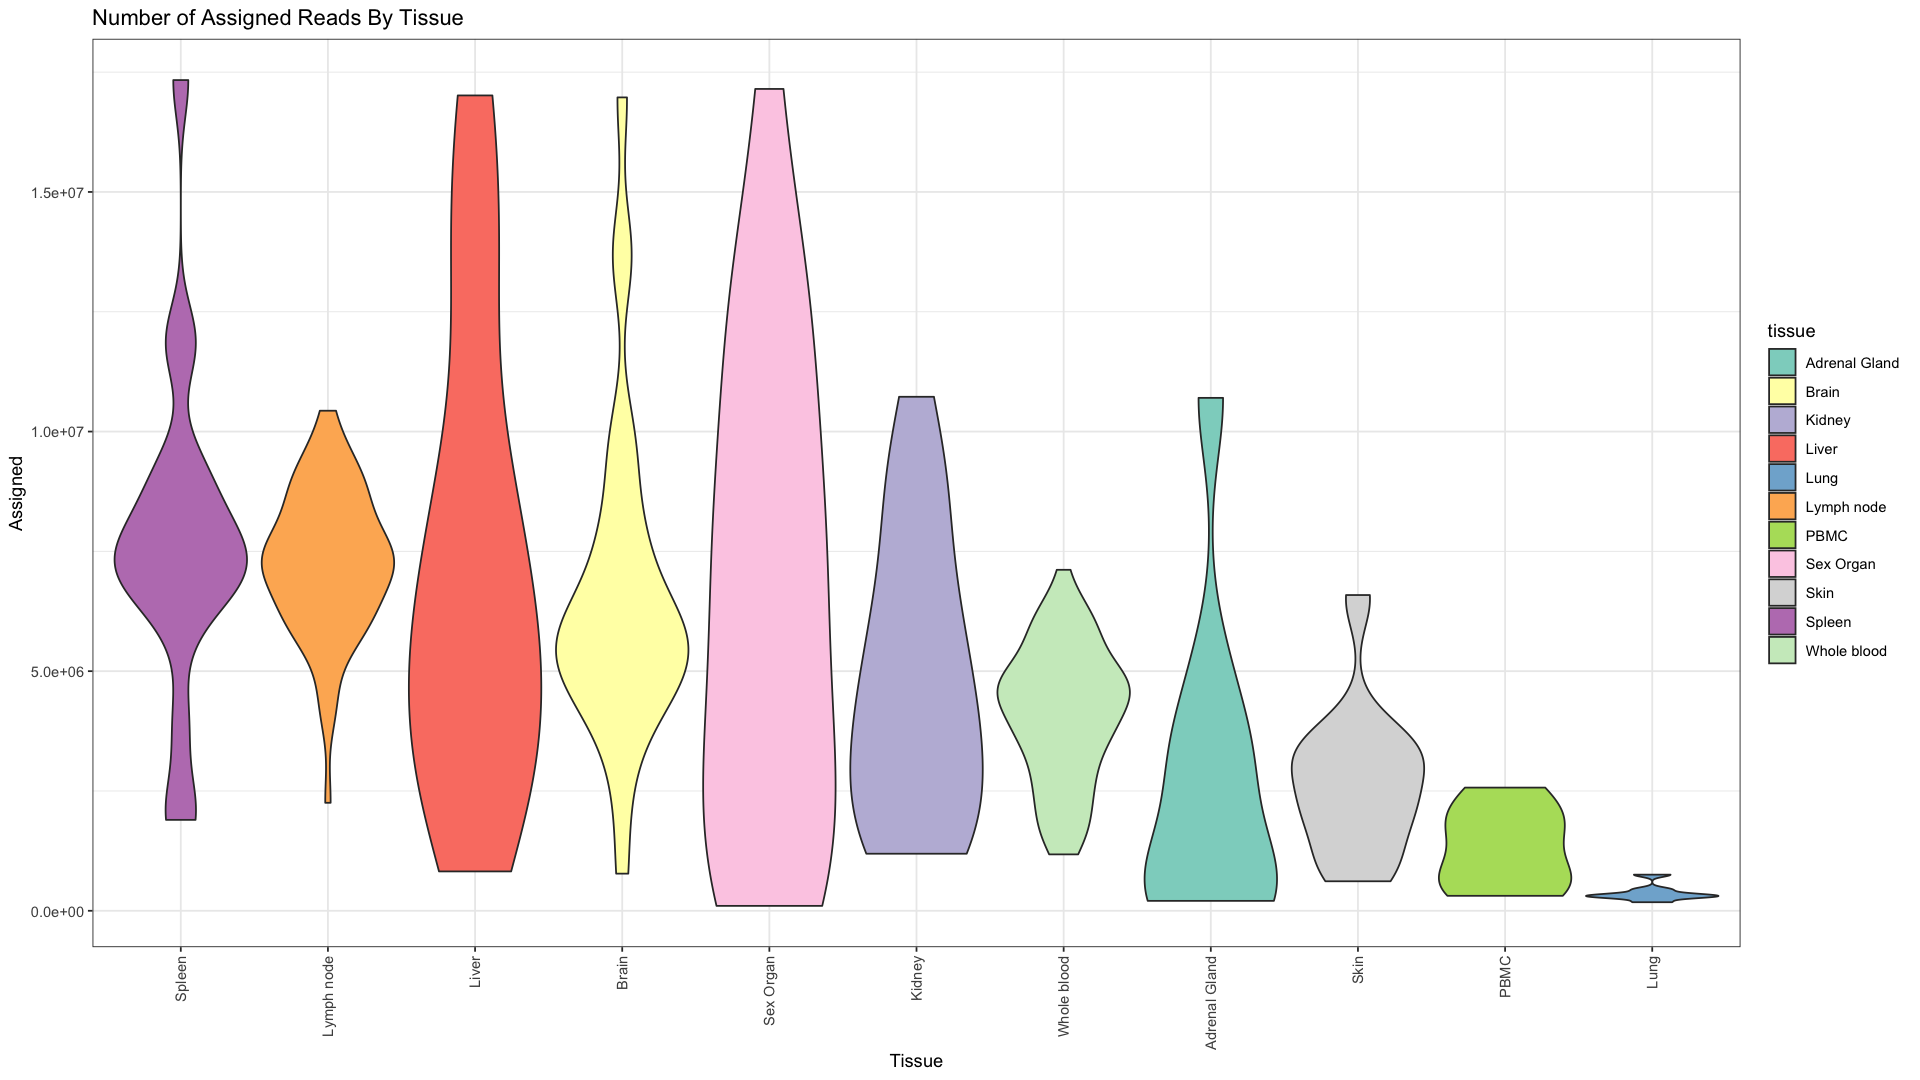

In [26]:
ggplot(sample.info.df, aes(y=Assigned,x=reorder(tissue,-Assigned,mean), fill=tissue)) + 
  geom_violin(scale='width') +
 theme_bw() + 
 theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
 scale_fill_manual(values=tissue.pal) +
 scale_x_discrete(name="Tissue") + 
 ggtitle("Number of Assigned Reads By Tissue")

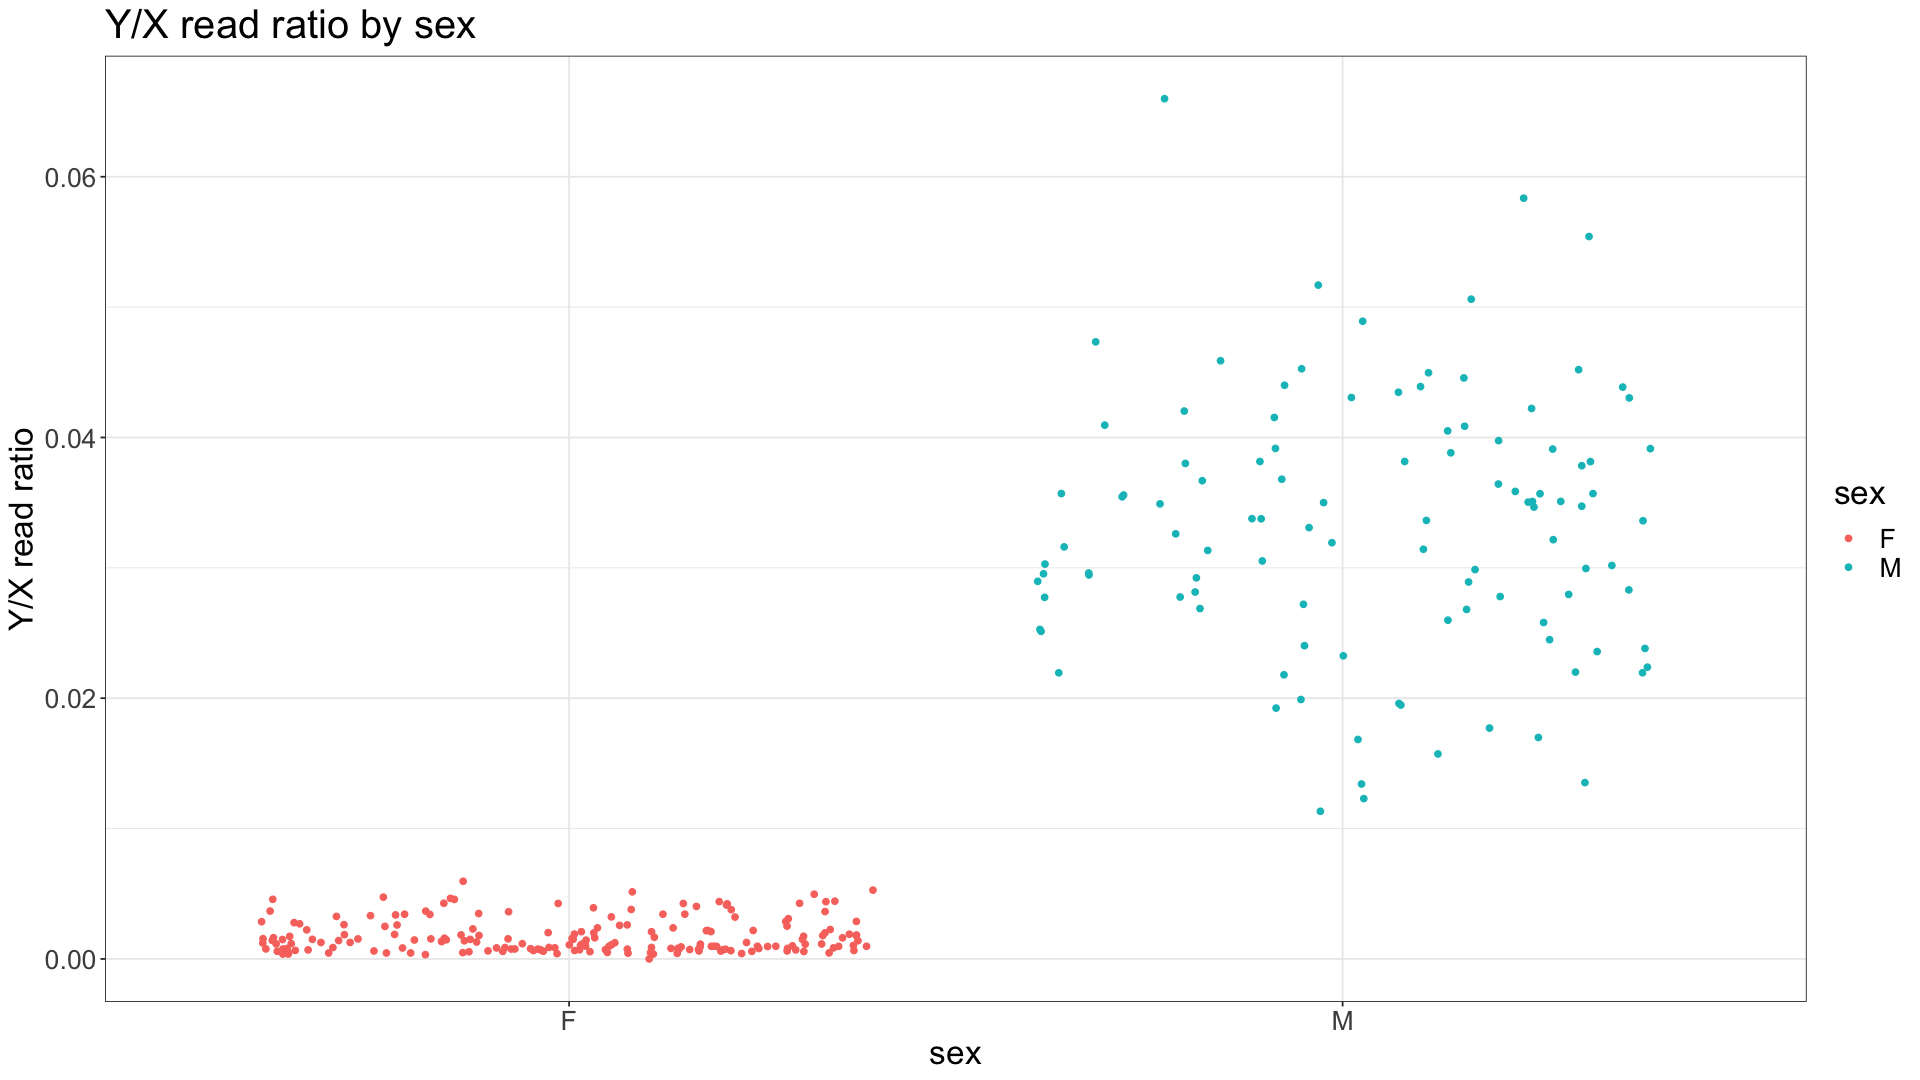

In [27]:
ggplot(sample.info.df, aes(x=sex,y=Y_X_ratio,color=sex)) +
 geom_jitter() +
 theme_bw() +
 scale_y_continuous(name = "Y/X read ratio") +
 ggtitle("Y/X read ratio by sex") +
 theme(text=element_text(size=20,color='black'))

In [42]:
ggsave("plots/y_x_read_ratio.pdf",w=8,h=8)

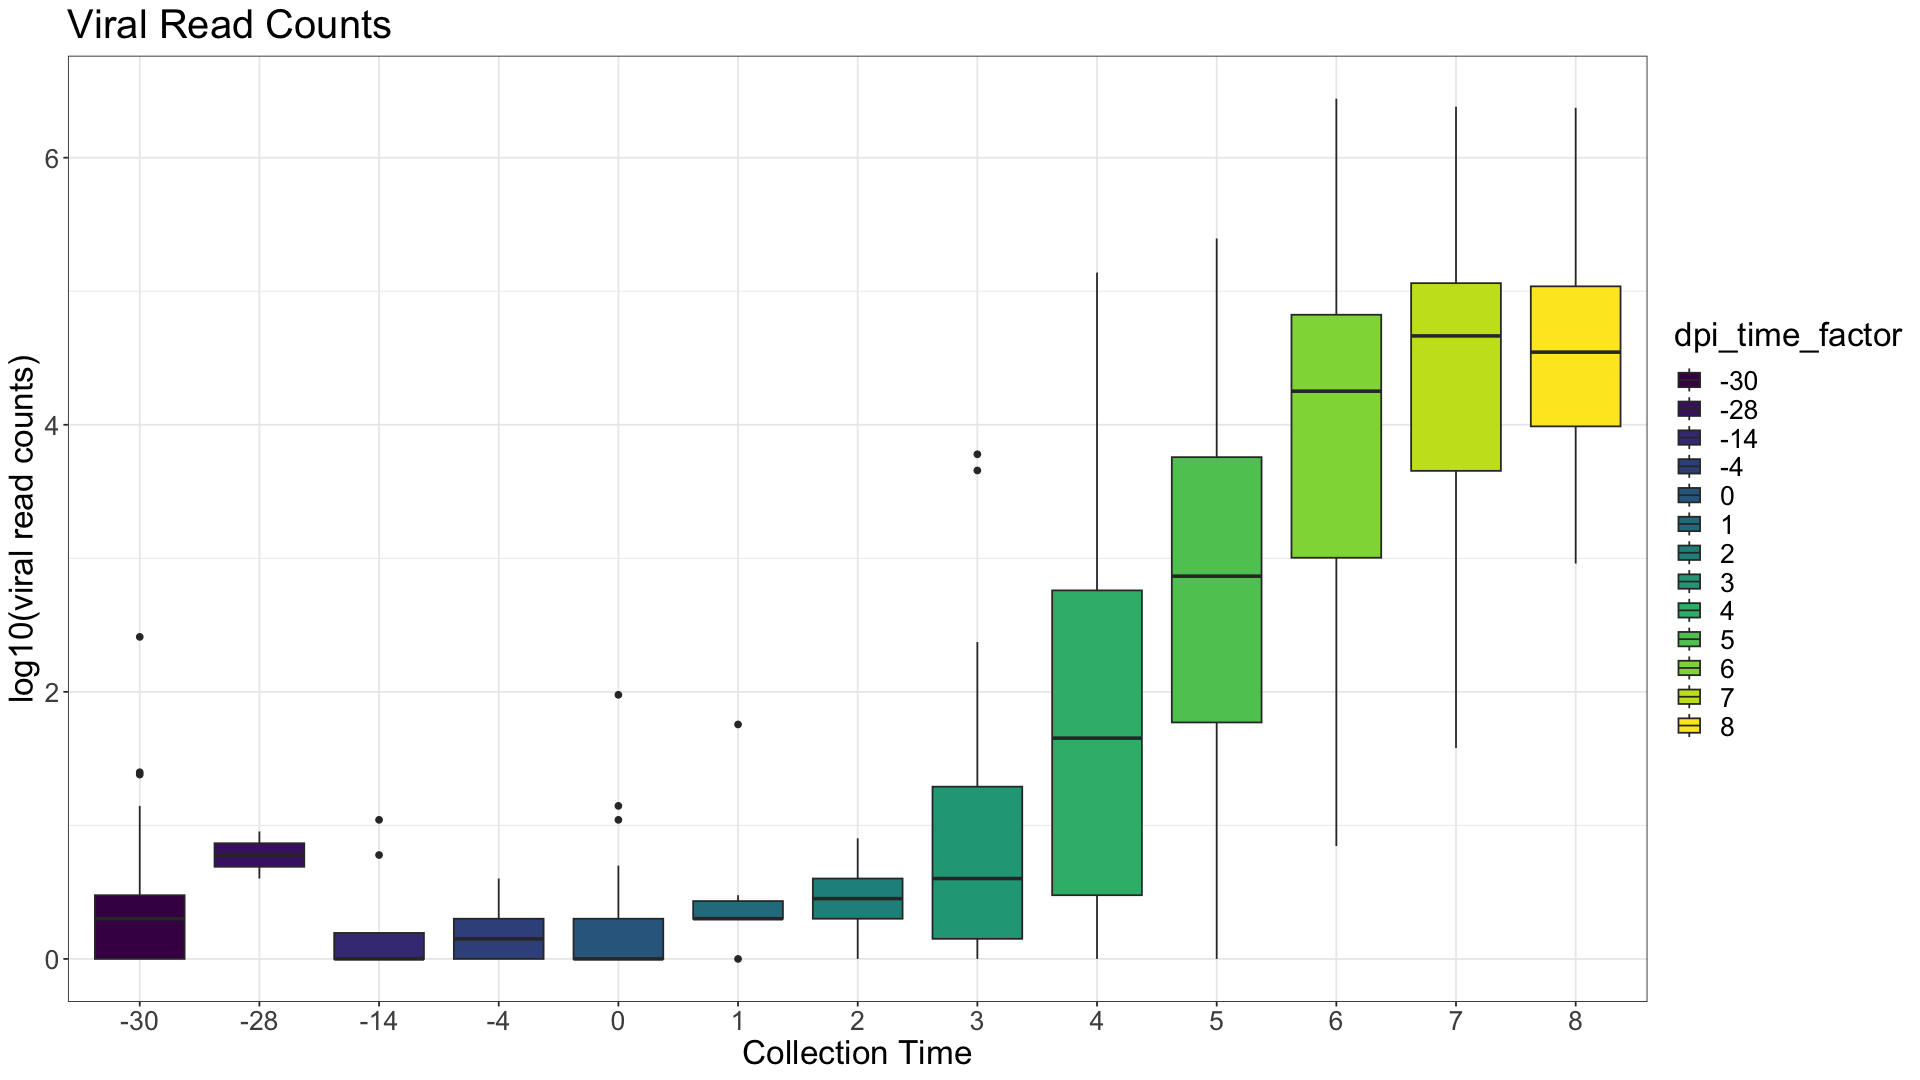

In [28]:
sample.info.df %>% 
  filter(!is.na(dpi_time_factor)) %>%
  ggplot(aes(x=dpi_time_factor, y=log10(viralReadCount+1),fill=dpi_time_factor)) + 
  geom_boxplot() +
  theme_bw() + 
  scale_fill_viridis_d() +
  ggtitle('Viral Read Counts') +
  scale_y_continuous(name='log10(viral read counts)') +
  scale_x_discrete(name='Collection Time') +
  theme(text=element_text(size=20,color='black'))

In [24]:
ggsave('plots/viral_reads.png',w=10,h=10)

In [25]:
colnames(sample.info.df)

[1] "file_identifiers"              "A.identifier"                 
 [3] "biosample"                     "batch.extraction"             
 [5] "irf.study.id"                  "id.cohort"                    
 [7] "id.individual"                 "tissue"                       
 [9] "data.received"                 "dn.rna"                       
[11] "date.broad.extract"            "quant.18s"                    
[13] "quant.18s.sd"                  "quant.kulesh"                 
[15] "quant.kulesh.sd"               "rin.e"                        
[17] "rna.conc.ng.uL"                "lib.conc.pmolar"              
[19] "xgen.index"                    "Assigned"                     
[21] "Unassigned_Unmapped"           "Unassigned_Read_Type"         
[23] "Unassigned_Singleton"          "Unassigned_MappingQuality"    
[25] "Unassigned_Chimera"            "Unassigned_FragmentLength"    
[27] "Unassigned_Duplicate"          "Unassigned_MultiMapping"      
[29] "Unassigned_Secondary"          "Unassigned_NonSplit"          
[31] "Unassigned_NoFeatures"         "Unassigned_Overlapping_Length"
[33] "Unassigned_Ambiguity"          "sub.tissue"                   
[35] "SampleType"                    "study.group"                  
[37] "challenge.group"               "animal.number"                
[39] "animal.tatoo"                  "sex"                          
[41] "weight"                        "birth.date"                   
[43] "viralReadCount"                "hostReadCount"                
[45] "pc.viral.reads"                "cohort.uncertain"             
[47] "cohort.numeric"                "totalReadCount"               
[49] "totalUnassigned"               "chrY_count"                   
[51] "chrX_count"                    "total_count"                  
[53] "Xist"                          "sex.1"                        
[55] "pc_Y"                          "pc_X"                         
[57] "Y_X_ratio"                     "sex_pred"                     
[59] "pred_recorded_sex_mismatch"    "dpi_time"                     
[61] "dpi_time_factor"               "xist_counts"                  
[63] "predicted_sex"                 "pred_rec_sex_mismatch"        
[65] "full.tissue"                   "sample_id_dedup"              
[67] "duplicate_sequencing"          "dpi_time_2"

In [29]:
sample.info.df %>% filter(animal.number == 'NHP21' & dpi_time_factor == 4 & sub.tissue == 'Brain-Wh')

,file_identifiers,A.identifier,biosample,batch.extraction,irf.study.id,id.cohort,id.individual,tissue,data.received,dn.rna,⋯,pred_recorded_sex_mismatch,dpi_time,dpi_time_factor,xist_counts,predicted_sex,pred_rec_sex_mismatch,full.tissue,sample_id_dedup,duplicate_sequencing,dpi_time_2
,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<dttm>,<chr>,⋯,<lgl>,<chr>,<fct>,<int>,<chr>,<lgl>,<fct>,<chr>,<lgl>,<chr>
A0173_S111_L002,A0173_S111_L002,A0173,RA1849_Brain-Wh,K,49-E2,D004,RA1849,Brain,2019-01-10,RA1849_Brain-Wh_dnRNA-L,⋯,FALSE,4,4,0,M,FALSE,Brain:Brain-Wh,NHP21-4-Brain:Brain-Wh,FALSE,4


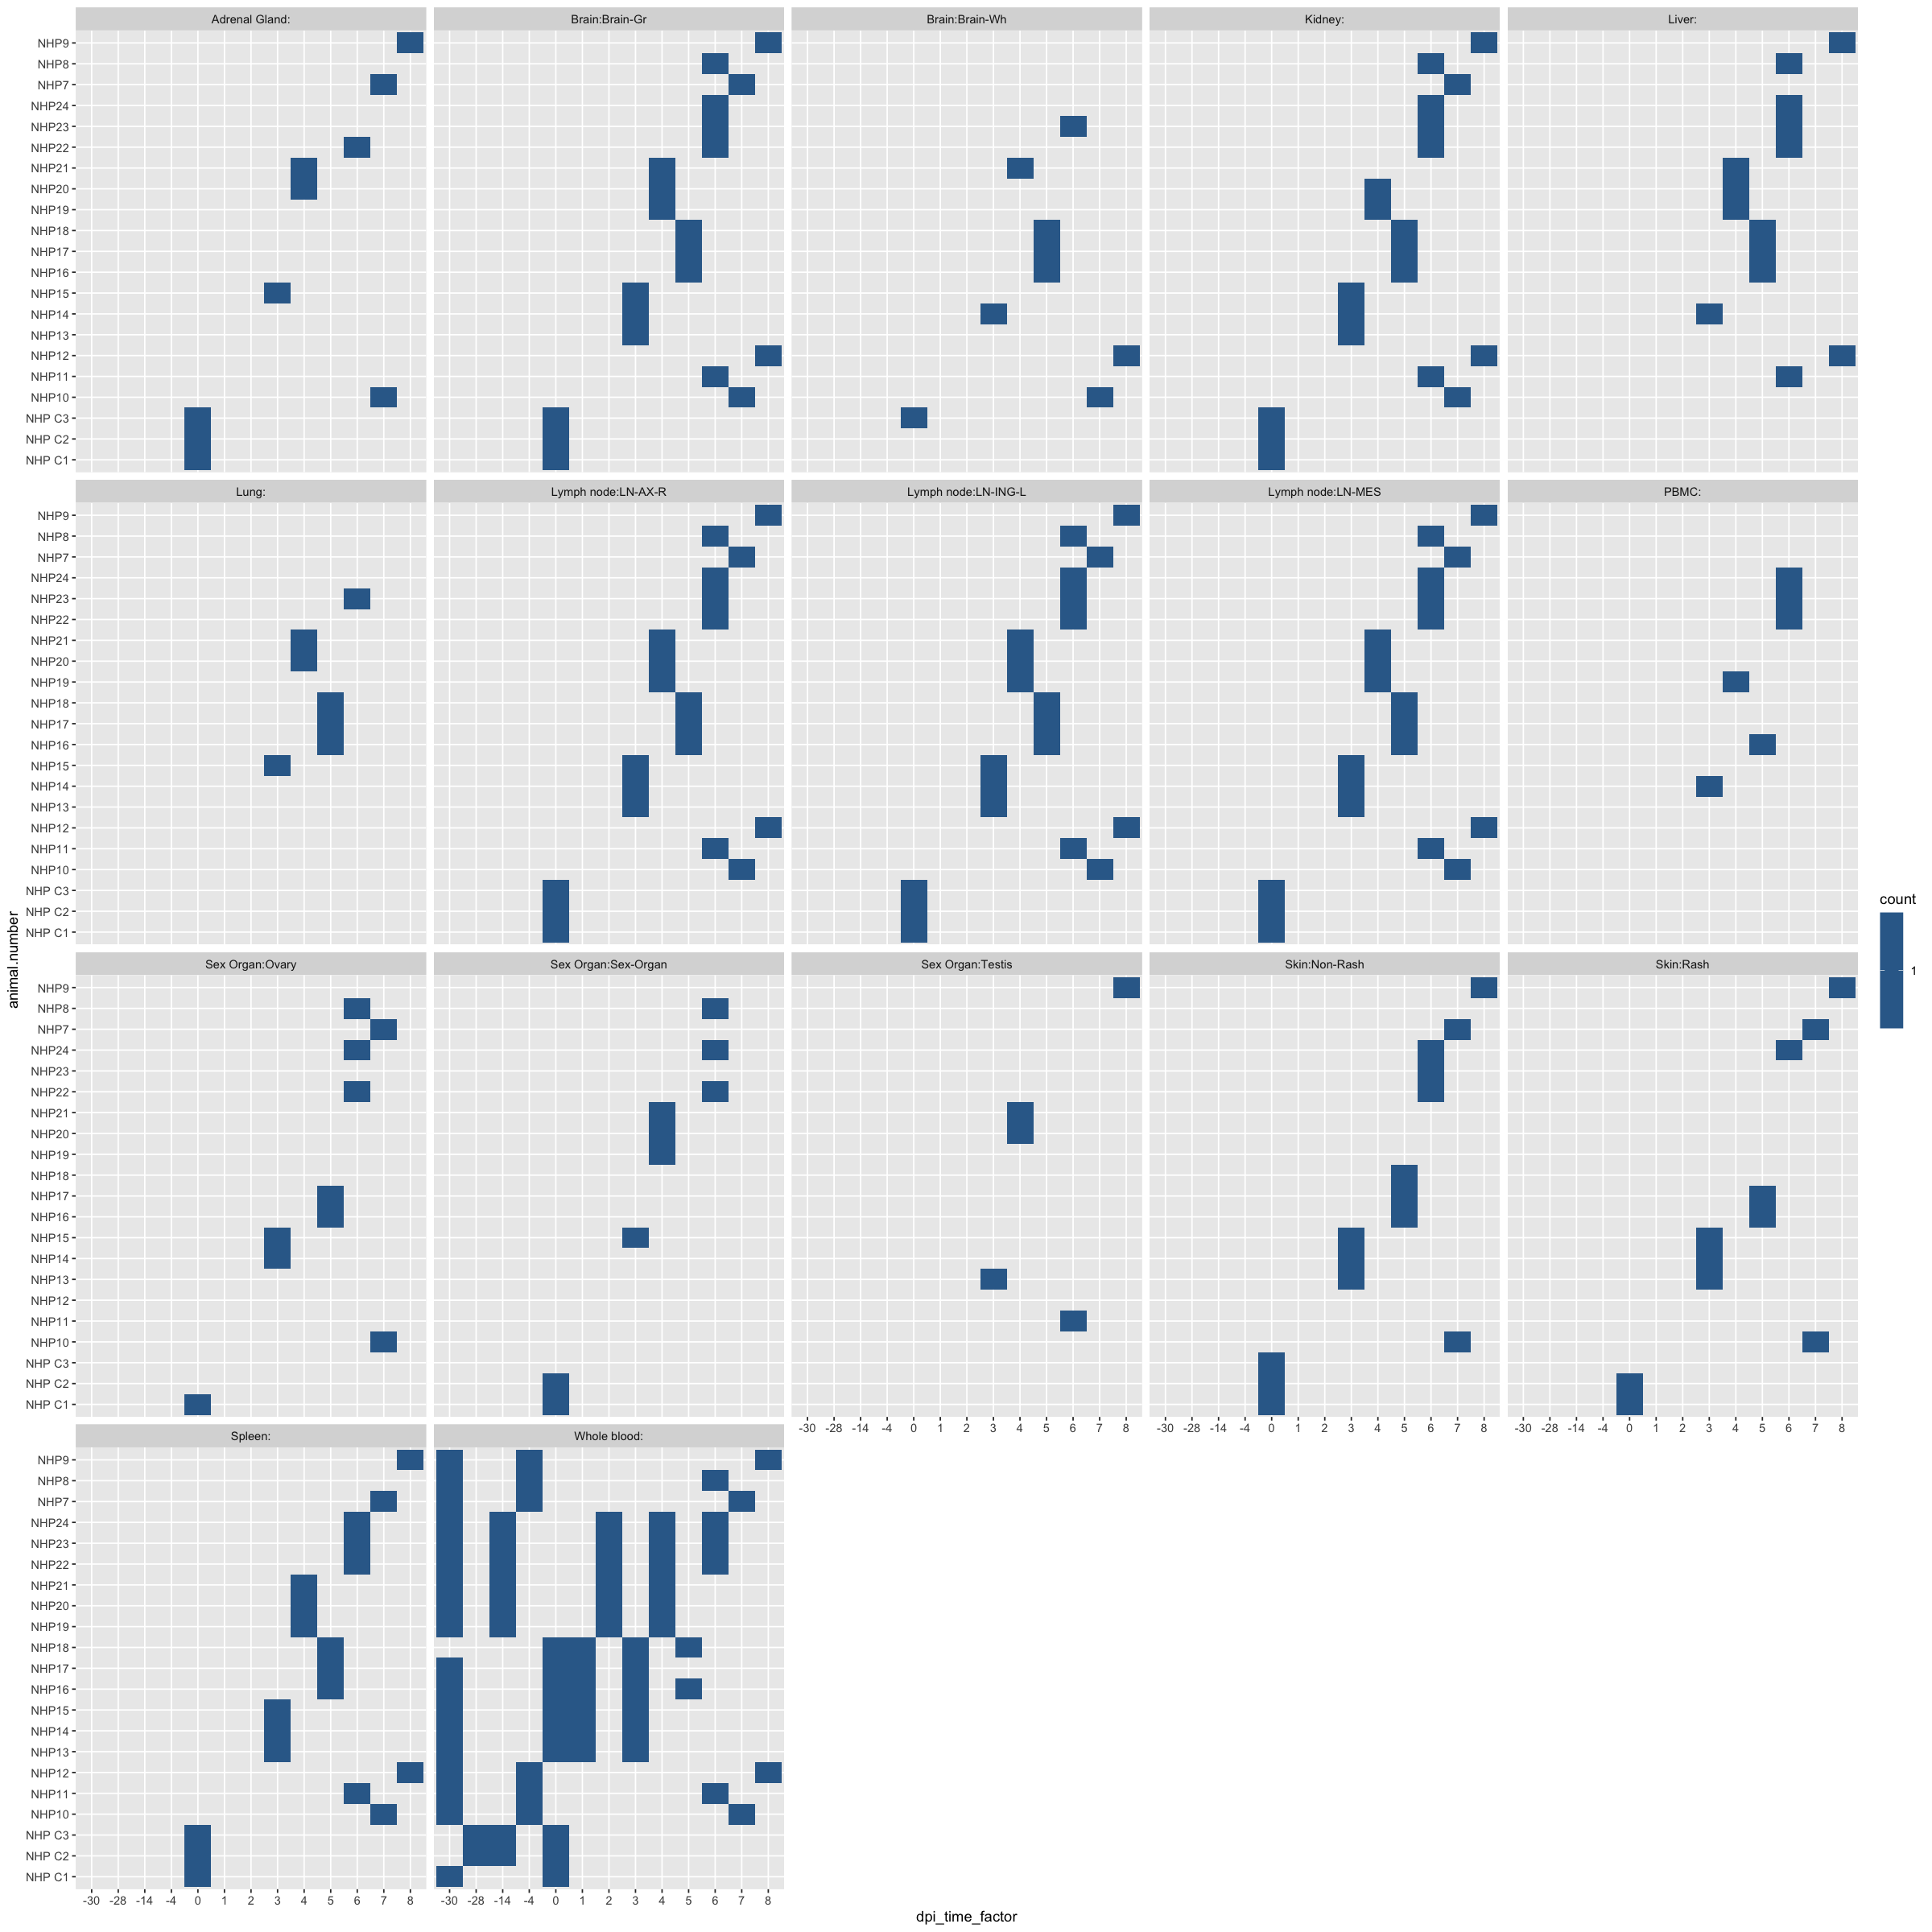

In [30]:
options(repr.plot.width = 20, repr.plot.height = 20)
ggplot(sample.info.df, aes(x=dpi_time_factor,y=animal.number,fill=after_stat(count))) + 
    stat_bin2d() + 
    facet_wrap(~paste0(tissue,':',sub.tissue))

In [31]:
colnames(sample.info.df)

[1] "file_identifiers"              "A.identifier"                 
 [3] "biosample"                     "batch.extraction"             
 [5] "irf.study.id"                  "id.cohort"                    
 [7] "id.individual"                 "tissue"                       
 [9] "data.received"                 "dn.rna"                       
[11] "date.broad.extract"            "quant.18s"                    
[13] "quant.18s.sd"                  "quant.kulesh"                 
[15] "quant.kulesh.sd"               "rin.e"                        
[17] "rna.conc.ng.uL"                "lib.conc.pmolar"              
[19] "xgen.index"                    "Assigned"                     
[21] "Unassigned_Unmapped"           "Unassigned_Read_Type"         
[23] "Unassigned_Singleton"          "Unassigned_MappingQuality"    
[25] "Unassigned_Chimera"            "Unassigned_FragmentLength"    
[27] "Unassigned_Duplicate"          "Unassigned_MultiMapping"      
[29] "Unassigned_Secondary"          "Unassigned_NonSplit"          
[31] "Unassigned_NoFeatures"         "Unassigned_Overlapping_Length"
[33] "Unassigned_Ambiguity"          "sub.tissue"                   
[35] "SampleType"                    "study.group"                  
[37] "challenge.group"               "animal.number"                
[39] "animal.tatoo"                  "sex"                          
[41] "weight"                        "birth.date"                   
[43] "viralReadCount"                "hostReadCount"                
[45] "pc.viral.reads"                "cohort.uncertain"             
[47] "cohort.numeric"                "totalReadCount"               
[49] "totalUnassigned"               "chrY_count"                   
[51] "chrX_count"                    "total_count"                  
[53] "Xist"                          "sex.1"                        
[55] "pc_Y"                          "pc_X"                         
[57] "Y_X_ratio"                     "sex_pred"                     
[59] "pred_recorded_sex_mismatch"    "dpi_time"                     
[61] "dpi_time_factor"               "xist_counts"                  
[63] "predicted_sex"                 "pred_rec_sex_mismatch"        
[65] "full.tissue"                   "sample_id_dedup"              
[67] "duplicate_sequencing"          "dpi_time_2"

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


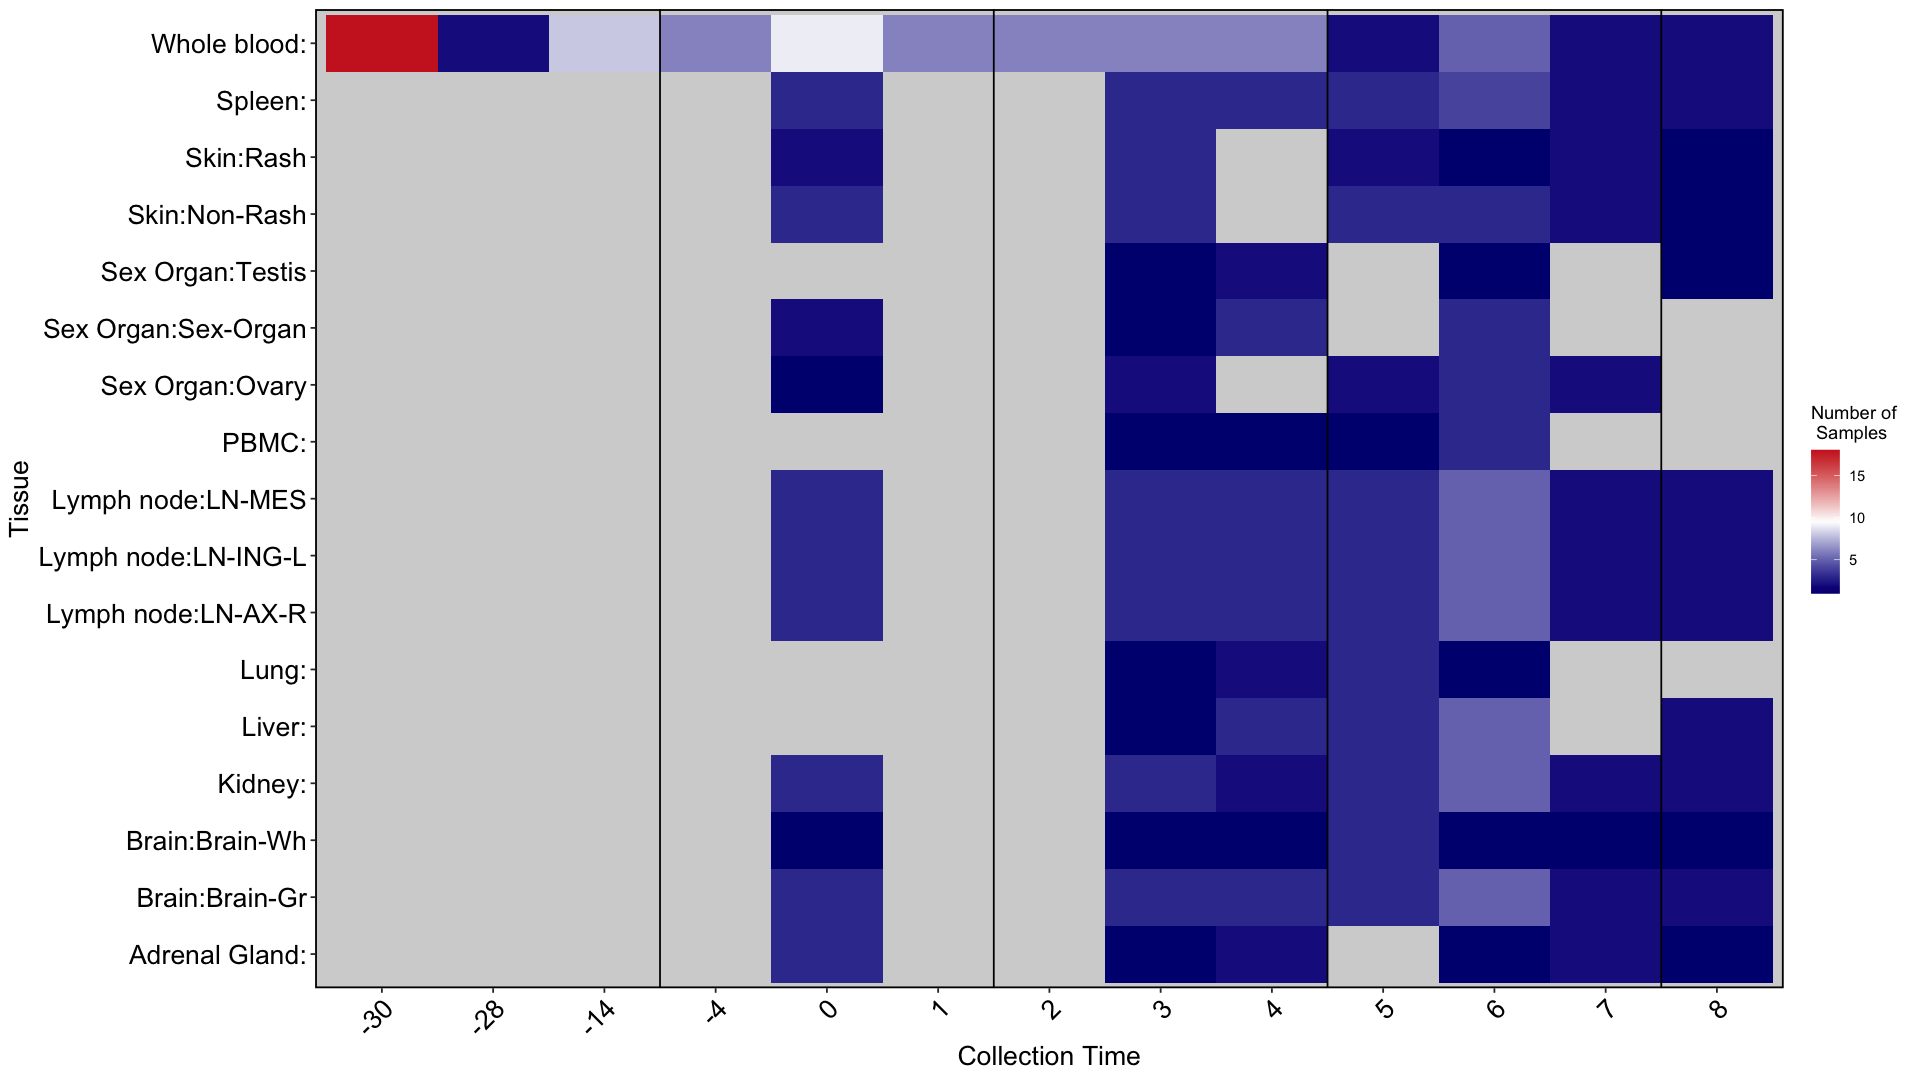

In [32]:
options(repr.plot.width = 16, repr.plot.height = 9)
ggplot(sample.info.df, aes(x=dpi_time_factor,y=paste0(tissue,':',sub.tissue),fill=after_stat(count))) + 
    stat_bin2d() + 
    theme_bw() + 

scale_fill_gradientn(name="Number of \n Samples",colours = colorRampPalette(c("navy", "white","firebrick3"))(100), guide = "colourbar")+
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank()) +
    theme(axis.text.x = element_text(angle = 45,hjust=1)) +
    theme(axis.text=element_text(size=rel(1.2)),
         panel.border = element_rect(colour = "black", fill=NA, size=1))+
    scale_x_discrete(name='Collection Time')+
theme(panel.background=element_rect(fill="lightgrey", colour="lightgrey")) +
    geom_vline(xintercept=c(3.5,6.5,9.5,12.5,18.5,19.5))+
    scale_y_discrete('Tissue') +
    theme(axis.text=element_text(size=16,color='black'),axis.title=element_text(size=16,color='black'))

In [36]:
ggsave('plots/sample_overview.pdf',w=16,h=9)